In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# observation
1. In Applicantlncome there is huge gap between 75% and max.
2.In coapplicantIncome also there is huge gap between 75% and Max and Min & 25% is 0.
3.In LoanAmount there is some missing value & also huge gap between 75% and Max.
4.In loanAmount_Term there is also some missing value.
5.In credit_History also some missing value.

As Loan_ID has only unique valueso we have to drop that column

In [7]:
data=data.drop('Loan_ID',axis=1)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(614, 12)

In [10]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [18]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

As we can see only 3 nan present in Married column so we will fill nan with majority 

In [22]:
data["Married"]= data["Married"].replace('nan','Yes')

In [23]:
data["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
data['Married']= data['Married'].fillna(data['Married'].mode()[0])

In [25]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [39]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [41]:
data['Dependents']=data['Dependents'].replace('3+',3)

In [42]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [27]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
data['LoanAmount']= data.LoanAmount.fillna(data.LoanAmount.mean())
data['Loan_Amount_Term']= data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0])
data['Credit_History']= data.Credit_History.fillna(data.Credit_History.mode()[0])
data['Dependents']= data.Dependents.fillna(data.Dependents.mode()[0])

In [43]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [45]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
data['Gender']=le.fit_transform(data['Gender'])
data['Married']=le.fit_transform(data['Married'])
data['Education']=le.fit_transform(data['Education'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
data['Property_Area']=le.fit_transform(data['Property_Area'])
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

Now we have to check data distribution through visualization.

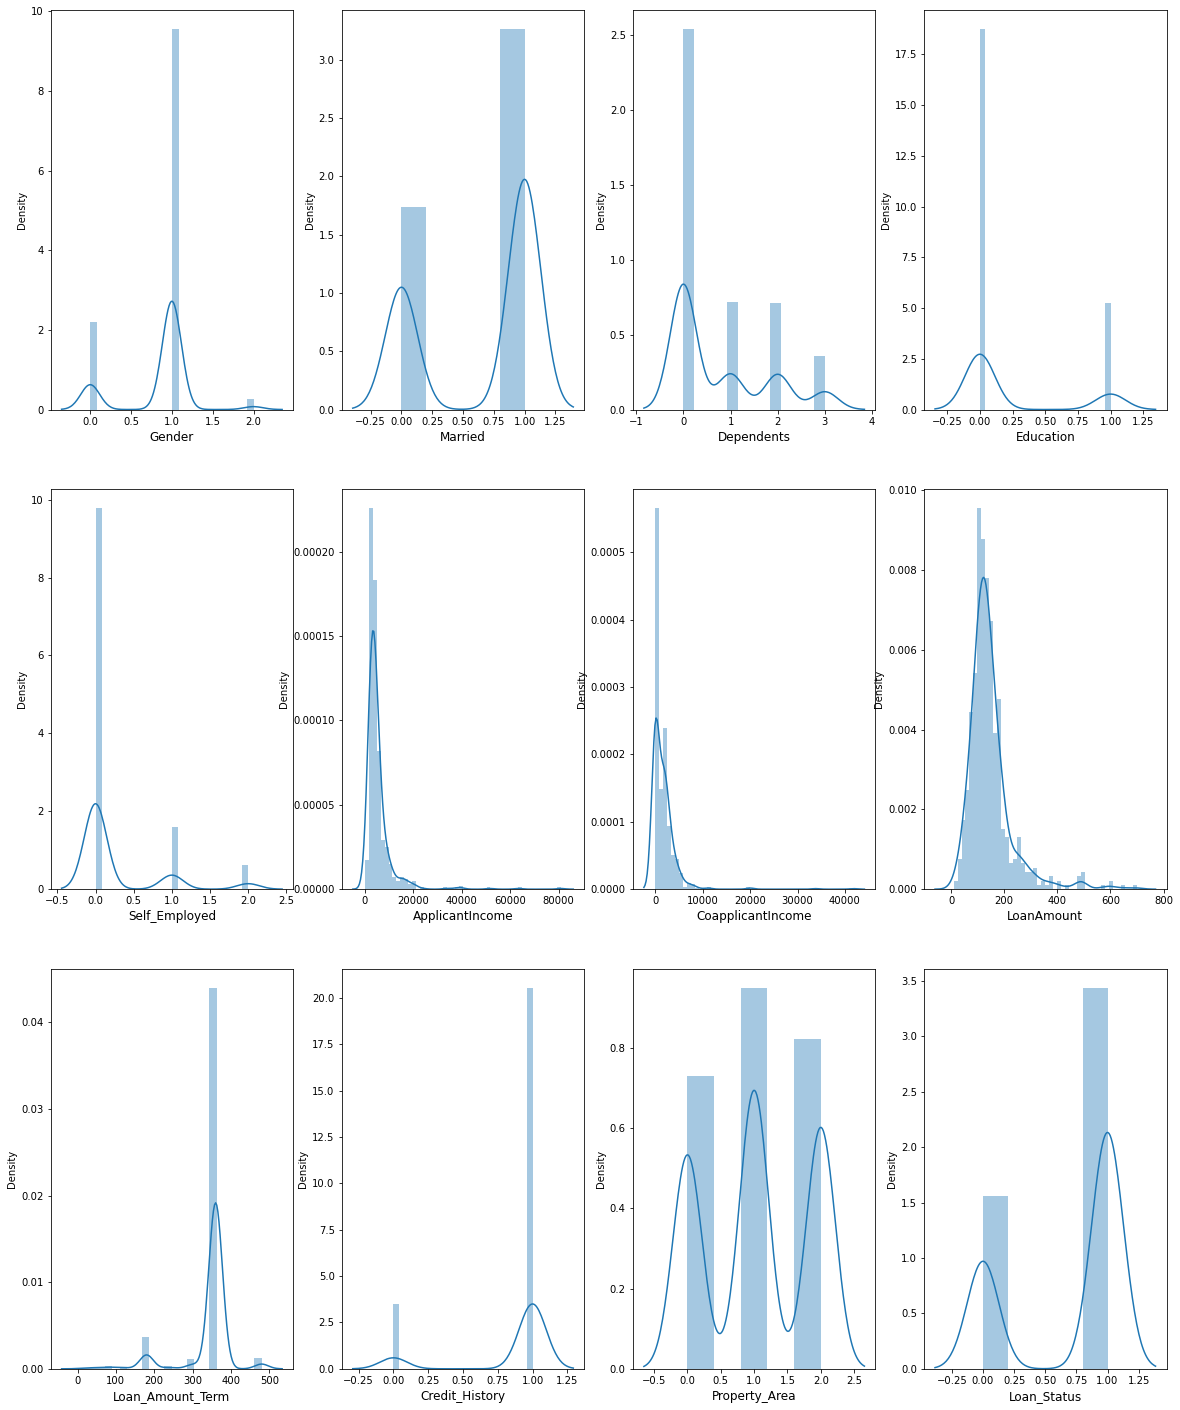

In [48]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

# Observation
1. ApplicantIncome has right skew.
2. CoapplicantIncome has right skew.
3. LoanAmount has right skew.

so we have to treat the data.

In [49]:
from scipy.stats import zscore

In [50]:
z_score= zscore(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [51]:
abs_z_score=np.abs(z_score)

In [52]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

In [53]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.833616,0.650255,0.227504,0.227504,4649.770798,1415.660306,135.351558,342.478778,0.853990,1.035654,0.691002
std,0.419942,0.477295,0.419577,0.524103,2944.018096,1653.363445,56.320095,64.398591,0.353417,0.789225,0.462473
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2873.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3750.000000,1229.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5503.000000,2253.000000,160.000000,360.000000,1.000000,2.000000,1.000000
max,2.000000,1.000000,1.000000,2.000000,20667.000000,8980.000000,380.000000,480.000000,1.000000,2.000000,1.000000


# Now data looks good to go for next process.

In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
x=data.drop('Loan_Status',axis=1)
y=data.Loan_Status

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [57]:
rfc=RandomForestClassifier()

In [59]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
params={'n_estimators':range(10,20),'criterion':['entropy','gini'],'max_depth':range(10,15),'min_samples_split':[10,11,12,13,14,15],'min_samples_leaf':[5,6]}

In [62]:
grd=GridSearchCV(rfc,param_grid=params)

In [63]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 15), 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'n_estimators': range(10, 20)})

In [64]:
print('best_params=>',grd.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 5, 'min_samples_split': 14, 'n_estimators': 10}


In [65]:
rfc=grd.best_estimator_

In [66]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, min_samples_leaf=5, min_samples_split=14,
                       n_estimators=10)

In [67]:
y_pred=rfc.predict(x_test)

In [68]:
rfc_conf_mat=confusion_matrix(y_test,y_pred)
print('\n conf_mat=>','\n',rfc_conf_mat)


 conf_mat=> 
 [[ 22  19]
 [  2 105]]


In [69]:
print('\n Accuracy_score=>',accuracy_score(y_test,y_pred))


 Accuracy_score=> 0.8581081081081081


In [70]:
print('Report=>',classification_report(y_test,y_pred))

Report=>               precision    recall  f1-score   support

           0       0.92      0.54      0.68        41
           1       0.85      0.98      0.91       107

    accuracy                           0.86       148
   macro avg       0.88      0.76      0.79       148
weighted avg       0.87      0.86      0.84       148



# we have to find best model for this dataset

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
lr= LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

In [75]:
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
print('LogisticRegression:=>',lr.score(x_test,y_test))

LogisticRegression:=> 0.8445945945945946


In [78]:
print('KNN_Score:=>',knn.score(x_test,y_test))

KNN_Score:=> 0.7027027027027027


In [79]:
print('DecisionTree_Score:=>',dt.score(x_test,y_test))

DecisionTree_Score:=> 0.7364864864864865


In [80]:
print('RandomForest_Score;=>',rfc.score(x_test,y_test))

RandomForest_Score;=> 0.8445945945945946
